![Imgur](https://imgur.com/GZSklhL.png)

## [Link to my Kaggle Notebook](https://www.kaggle.com/paulrohan2020/xgboost-on-donor-choose)

# [DonorsChoose](https://en.wikipedia.org/wiki/DonorsChoose)

DonorsChoose is a United States-based nonprofit organization that allows individuals to donate directly to public school classroom projects. The organization has been given Charity Navigator's highest rating every year since 2005.[4] In January 2018, they announced that 1 million projects had been funded. In 80% of public schools in the United States, at least one project has been requested on DonorsChoose. Schools from wealthy areas are more likely to make technology requests, while schools from less affluent areas are more likely to request basic supplies.[6] It has been noted that repeat donors on DonorsChoose typically donate to projects they have no prior relationship with, and most often fund projects serving financially challenged students.

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

# from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [2]:
# THIS IS FOR KAGGLE
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/donorschooseorg-application-screening/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


for dirname, _, filenames in os.walk('../input/glove-vector'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
project_data = pd.read_csv("../input/donorschooseorg-application-screening/train.csv")
resource_data =  pd.read_csv('../input/donorschooseorg-application-screening/resources.csv')

# project_data = pd.read_csv("../input/donorschooseorg-application-screening/train.csv", nrows=5000)
# resource_data =  pd.read_csv('../input/donorschooseorg-application-screening/resources.csv', nrows=5000)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/donorschooseorg-application-screening/sample_submission.csv
../input/donorschooseorg-application-screening/train.csv
../input/donorschooseorg-application-screening/test.csv
../input/donorschooseorg-application-screening/resources.csv
../input/glove-vector/glove_vectors


## 1.1 Reading Data

In [3]:
# project_data = pd.read_csv('../LARGE_Datasets/train.csv')
# resource_data = pd.read_csv('../LARGE_Datasets/resources.csv')

In [4]:
project_data.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')

In [5]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (182080, 16)
--------------------------------------------------
The attributes of data : ['id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 1.2 Data Analysis

Number of projects thar are approved for funding  154346 , ( 84.7682337434095 %)
Number of projects thar are not approved for funding  27734 , ( 15.23176625659051 %)


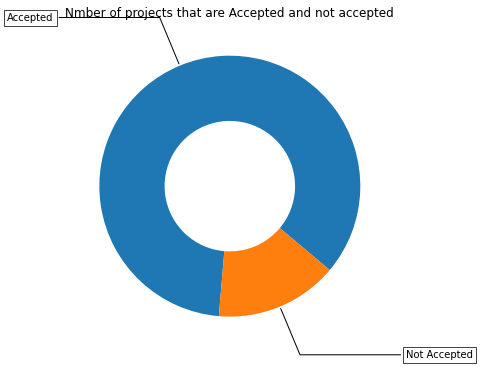

In [7]:
# this code is taken from 
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

### 1.2.1 Univariate Analysis: School State

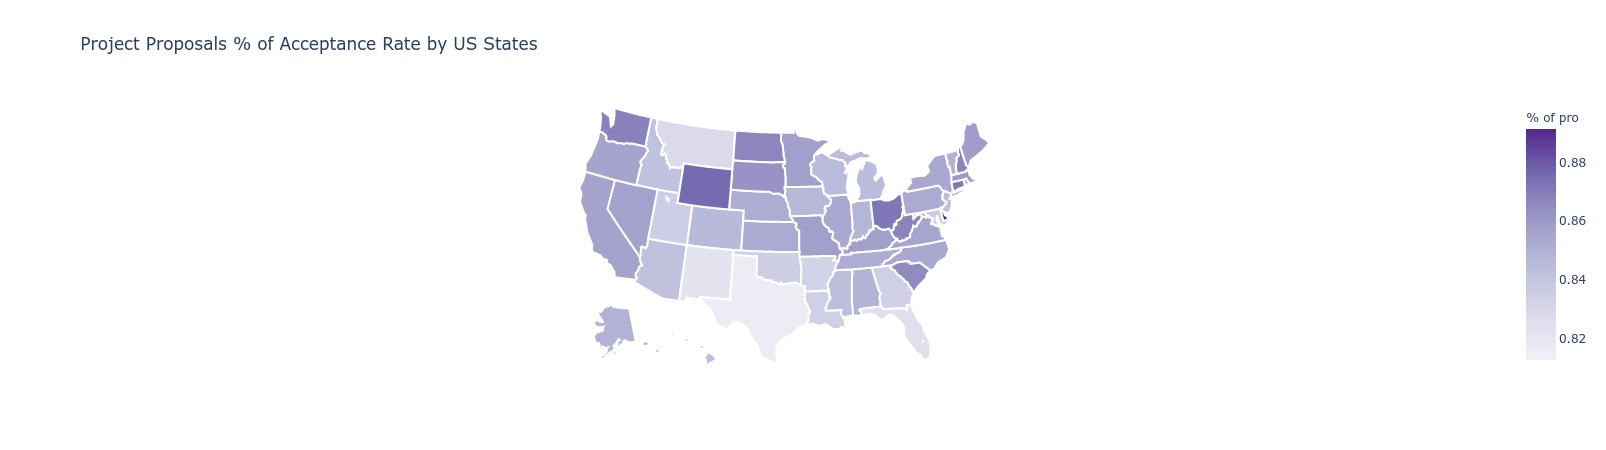

In [8]:
# Pandas dataframe grouby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')

In [9]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
7          DC       0.812639
43         TX       0.815670
32         NM       0.822052
9          FL       0.824500
26         MT       0.828125
States with highest % approvals
   state_code  num_proposals
47         WA       0.868050
6          CT       0.871294
35         OH       0.871467
50         WY       0.875706
8          DE       0.891341


In [10]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('% of projects aproved state wise')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [11]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    # https://stackoverflow.com/questions/60229375/solution-for-specificationerror-nested-renamer-is-not-supported-while-agg-alo
    
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

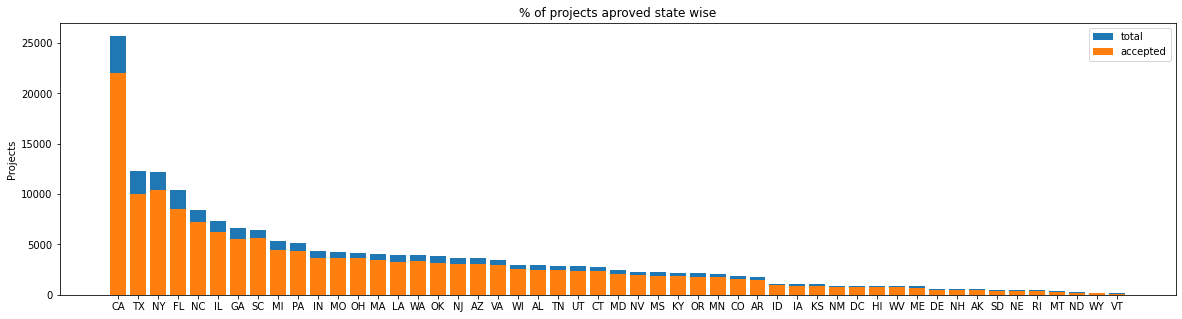

   school_state  project_is_approved  total       Avg
4            CA                22006  25695  0.856431
43           TX                10036  12304  0.815670
34           NY                10377  12157  0.853582
9            FL                 8541  10359  0.824500
27           NC                 7223   8463  0.853480
   school_state  project_is_approved  total       Avg
39           RI                  401    475  0.844211
26           MT                  318    384  0.828125
28           ND                  215    248  0.866935
50           WY                  155    177  0.875706
46           VT                  118    139  0.848921


In [12]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', top=False)

__Every state is having more than 80% success rate in approval__

### 1.2.2 Univariate Analysis: teacher_prefix

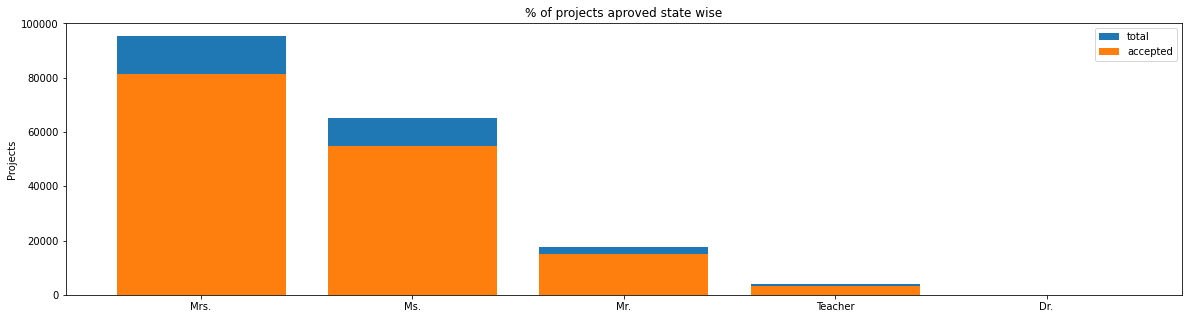

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                81484  95405  0.854085
3            Ms.                54854  65066  0.843052
1            Mr.                14876  17667  0.842022
4        Teacher                 3107   3912  0.794223
0            Dr.                   21     26  0.807692
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                81484  95405  0.854085
3            Ms.                54854  65066  0.843052
1            Mr.                14876  17667  0.842022
4        Teacher                 3107   3912  0.794223
0            Dr.                   21     26  0.807692


In [13]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

### 1.2.3 Univariate Analysis: project_grade_category

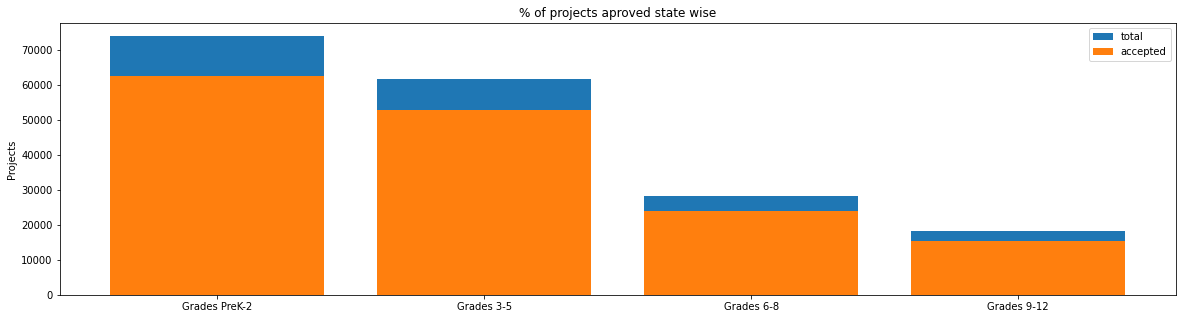

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                62594  73890  0.847124
0             Grades 3-5                52675  61682  0.853977
1             Grades 6-8                23783  28197  0.843459
2            Grades 9-12                15294  18311  0.835236
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                62594  73890  0.847124
0             Grades 3-5                52675  61682  0.853977
1             Grades 6-8                23783  28197  0.843459
2            Grades 9-12                15294  18311  0.835236


In [14]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

### 1.2.4 Univariate Analysis: project_subject_categories

In [15]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [16]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

id                        teacher_id teacher_prefix school_state  \
0  p036502  484aaf11257089a66cfedc9461c6bd0a            Ms.           NV   
1  p039565  df72a3ba8089423fa8a94be88060f6ed           Mrs.           GA   

  project_submitted_datetime project_grade_category  \
0        2016-11-18 14:45:59          Grades PreK-2   
1        2017-04-26 15:57:28             Grades 3-5   

  project_subject_subcategories             project_title  \
0                      Literacy  Super Sight Word Centers   
1  Performing Arts, Team Sports    Keep Calm and Dance On   

                                     project_essay_1  \
0  Most of my kindergarten students come from low...   
1  Our elementary school is a culturally rich sch...   

                                     project_essay_2 project_essay_3  \
0  I currently have a differentiated sight word c...             NaN   
1  We strive to provide our diverse population of...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need 6 Ipod Nano's to create and d...   
1             NaN  My students need matching shirts to wear for d...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            26                    1   
1                                             1                    0   

           clean_categories  
0         Literacy_Language  
1  Music_Arts Health_Sports

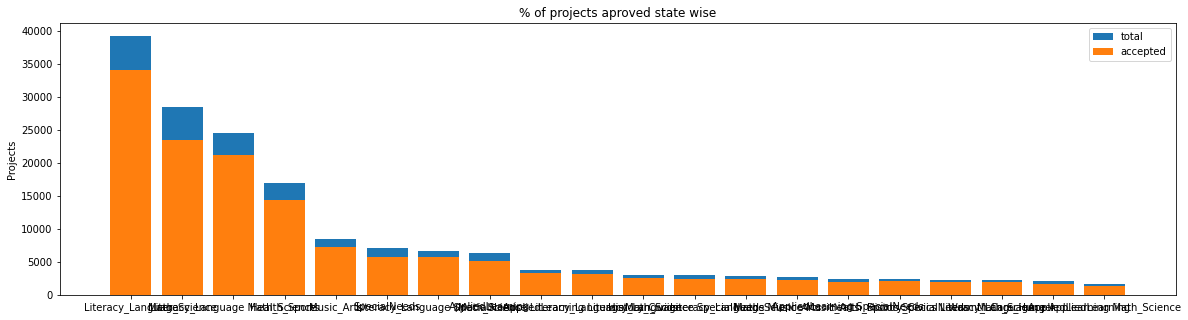

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                34148  39257  0.869858
32                    Math_Science                23446  28555  0.821082
28  Literacy_Language Math_Science                21246  24499  0.867219
8                    Health_Sports                14354  16951  0.846794
40                      Music_Arts                 7248   8527  0.850006
                    clean_categories  project_is_approved  total       Avg
14        Health_Sports SpecialNeeds                 2039   2368  0.861064
19  History_Civics Literacy_Language                 2026   2288  0.885490
50                Warmth Care_Hunger                 2020   2191  0.921953
33      Math_Science AppliedLearning                 1724   2071  0.832448
4       AppliedLearning Math_Science                 1375   1711  0.803624


In [17]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

In [18]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

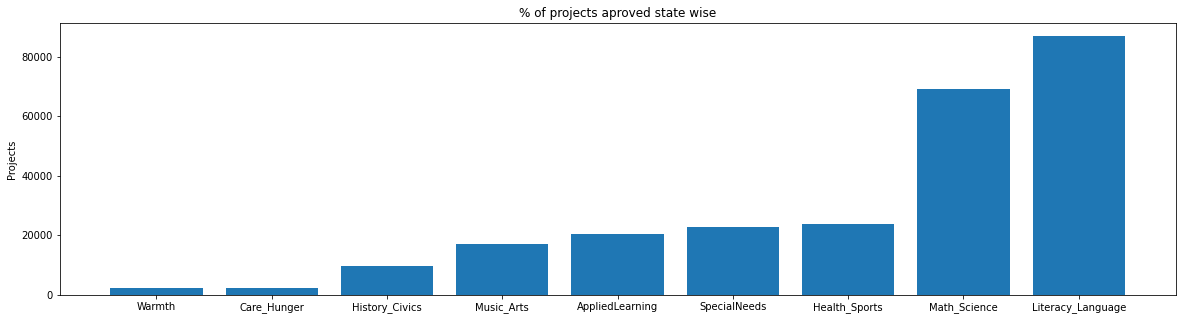

In [19]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [20]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      2327
Care_Hunger          :      2327
History_Civics       :      9726
Music_Arts           :     17054
AppliedLearning      :     20303
SpecialNeeds         :     22881
Health_Sports        :     23712
Math_Science         :     69248
Literacy_Language    :     86988


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [21]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [22]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

id                        teacher_id teacher_prefix school_state  \
0  p036502  484aaf11257089a66cfedc9461c6bd0a            Ms.           NV   
1  p039565  df72a3ba8089423fa8a94be88060f6ed           Mrs.           GA   

  project_submitted_datetime project_grade_category             project_title  \
0        2016-11-18 14:45:59          Grades PreK-2  Super Sight Word Centers   
1        2017-04-26 15:57:28             Grades 3-5    Keep Calm and Dance On   

                                     project_essay_1  \
0  Most of my kindergarten students come from low...   
1  Our elementary school is a culturally rich sch...   

                                     project_essay_2 project_essay_3  \
0  I currently have a differentiated sight word c...             NaN   
1  We strive to provide our diverse population of...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need 6 Ipod Nano's to create and d...   
1             NaN  My students need matching shirts to wear for d...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            26                    1   
1                                             1                    0   

           clean_categories        clean_subcategories  
0         Literacy_Language                   Literacy  
1  Music_Arts Health_Sports  PerformingArts TeamSports

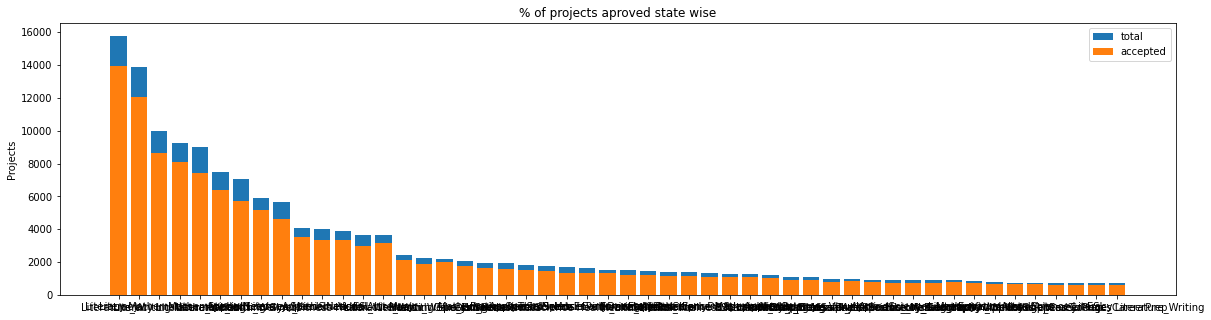

                clean_subcategories  project_is_approved  total       Avg
321                        Literacy                13946  15775  0.884057
323            Literacy Mathematics                12052  13863  0.869364
335  Literature_Writing Mathematics                 8648   9976  0.866881
322     Literacy Literature_Writing                 8098   9282  0.872441
346                     Mathematics                 7402   9041  0.818715
                    clean_subcategories  project_is_approved  total       Avg
197       EnvironmentalScience Literacy                  653    739  0.883627
79                   College_CareerPrep                  600    737  0.814111
3    AppliedSciences College_CareerPrep                  593    707  0.838755
127                                 ESL                  588    703  0.836415
17   AppliedSciences Literature_Writing                  593    695  0.853237


In [23]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

In [24]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

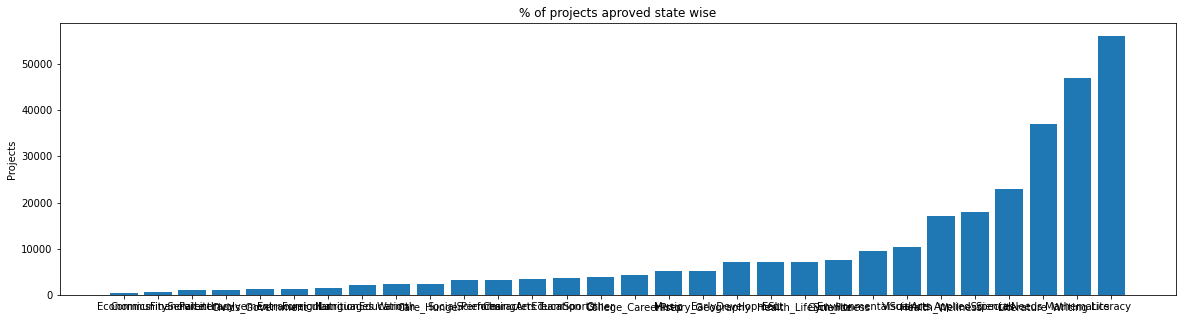

In [25]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [26]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       431
CommunityService     :       712
FinancialLiteracy    :       956
ParentInvolvement    :      1103
Civics_Government    :      1294
Extracurricular      :      1332
ForeignLanguages     :      1496
NutritionEducation   :      2236
Warmth               :      2327
Care_Hunger          :      2327
SocialSciences       :      3149
PerformingArts       :      3223
CharacterEducation   :      3519
TeamSports           :      3643
Other                :      3948
College_CareerPrep   :      4291
Music                :      5172
History_Geography    :      5258
EarlyDevelopment     :      7149
ESL                  :      7162
Health_LifeScience   :      7175
Gym_Fitness          :      7592
EnvironmentalScience :      9436
VisualArts           :     10399
Health_Wellness      :     17099
AppliedSciences      :     17966
SpecialNeeds         :     22881
Literature_Writing   :     36974
Mathematics          :     46884
Literacy             :     56066


### 1.2.6 Univariate Analysis: Text features (Title)

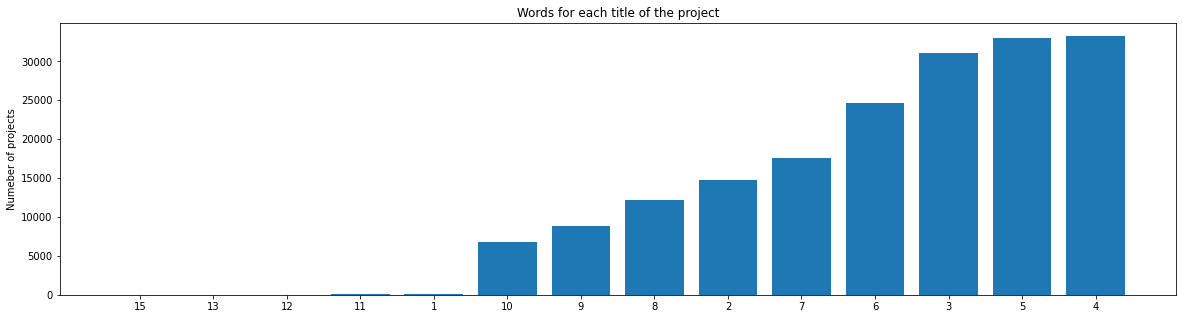

In [27]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [28]:
approved_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

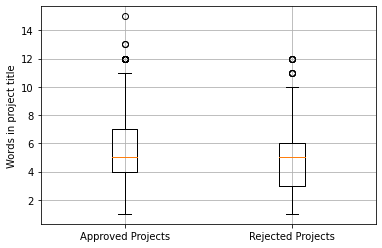

In [29]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

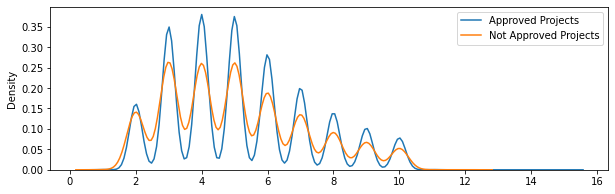

In [30]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.legend()
plt.show()

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [31]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

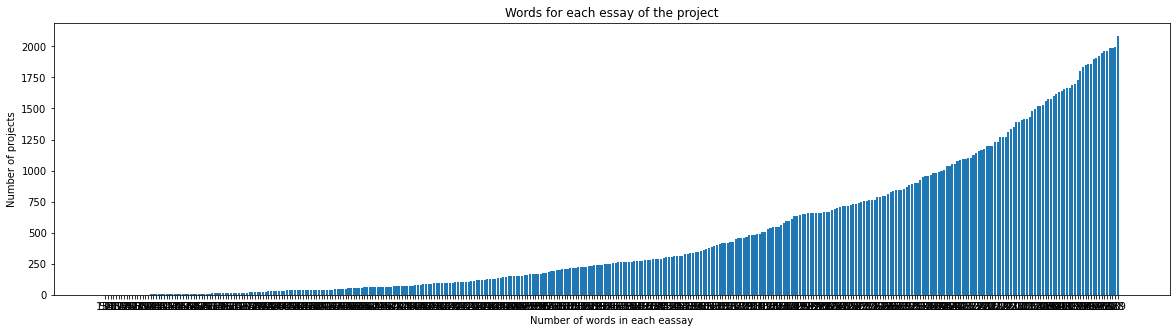

In [32]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['essay'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of projects')
plt.xlabel('Number of words in each eassay')
plt.title('Words for each essay of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

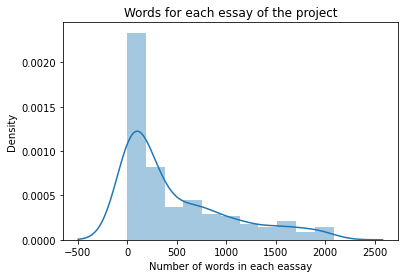

In [33]:
sns.distplot(word_count.values)
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.show()


In [34]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

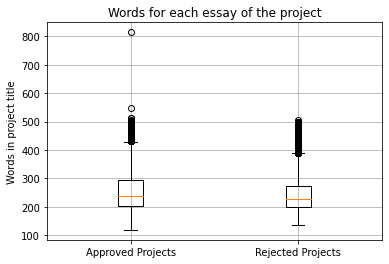

In [35]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

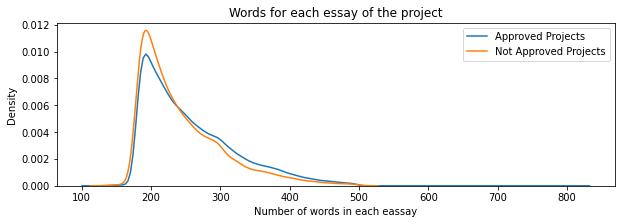

In [36]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

### 1.2.8 Univariate Analysis: Cost per project

In [37]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [38]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [39]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [40]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

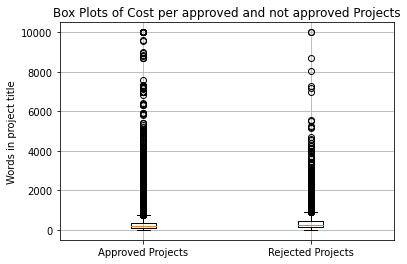

In [41]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

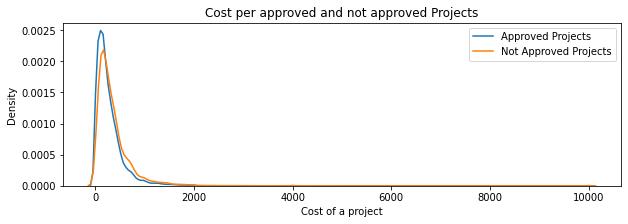

In [42]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [43]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.1          |
|     5      |       13.59       |         43.25         |
|     10     |       33.57       |         74.956        |
|     15     |       57.98       |         99.96         |
|     20     |       77.47       |        119.294        |
|     25     |       99.95       |        141.932        |
|     30     |       116.45      |         162.71        |
|     35     |       136.85      |        184.216        |
|     40     |       157.0       |        207.018        |
|     45     |       178.19      |        232.974        |
|     50     |       198.99      |         260.96        |
|     55     |       224.14      |        290.392        |
|     60     |       255.58      |        322.606        |
|     65     |       286.0       |        359.945       

# Now will be pre-processing the data

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

from nltk.corpus import stopwords
import pickle

from tqdm import tqdm
import os

## 1. Reading Data

In [45]:
# project_data = pd.read_csv('../LARGE_Datasets/train.csv', nrows=5000)
# resource_data = pd.read_csv('../LARGE_Datasets/resources.csv')

project_data = pd.read_csv("../input/donorschooseorg-application-screening/train.csv")
resource_data =  pd.read_csv('../input/donorschooseorg-application-screening/resources.csv')

In [46]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (182080, 16)
--------------------------------------------------
The attributes of data : ['id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [47]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 2. Preprocessing Categorical Features: project_grade_category

In [48]:
project_data['project_grade_category'].value_counts()

Grades PreK-2    73890
Grades 3-5       61682
Grades 6-8       28197
Grades 9-12      18311
Name: project_grade_category, dtype: int64

we need to remove the spaces, replace the '-' with '_' and convert all the letters to small

In [49]:
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
project_data['project_grade_category'].value_counts()

grades_prek_2    73890
grades_3_5       61682
grades_6_8       28197
grades_9_12      18311
Name: project_grade_category, dtype: int64

# 3. Preprocessing Categorical Features: project_subject_categories

In [50]:
project_data['project_subject_categories'].value_counts()

Literacy & Language                           39257
Math & Science                                28555
Literacy & Language, Math & Science           24499
Health & Sports                               16951
Music & The Arts                               8527
Special Needs                                  7065
Literacy & Language, Special Needs             6685
Applied Learning                               6310
Math & Science, Literacy & Language            3843
Applied Learning, Literacy & Language          3725
History & Civics                               3065
Math & Science, Special Needs                  3010
Literacy & Language, Music & The Arts          2878
Math & Science, Music & The Arts               2761
Applied Learning, Special Needs                2481
Health & Sports, Special Needs                 2368
History & Civics, Literacy & Language          2288
Warmth, Care & Hunger                          2191
Math & Science, Applied Learning               2071
Applied Lear

>remove spaces, 'the' <br>
replace '&' with '\_', and ',' with '_'

In [51]:
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' The ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace('&','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(',','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.lower()
project_data['project_subject_categories'].value_counts()

literacy_language                       39257
math_science                            28555
literacy_language_math_science          24499
health_sports                           16951
music_arts                               8527
specialneeds                             7065
literacy_language_specialneeds           6685
appliedlearning                          6310
math_science_literacy_language           3843
appliedlearning_literacy_language        3725
history_civics                           3065
math_science_specialneeds                3010
literacy_language_music_arts             2878
math_science_music_arts                  2761
appliedlearning_specialneeds             2481
health_sports_specialneeds               2368
history_civics_literacy_language         2288
warmth_care_hunger                       2191
math_science_appliedlearning             2071
appliedlearning_math_science             1711
literacy_language_history_civics         1315
health_sports_literacy_language   

# 4. Preprocessing Categorical Features: teacher_prefix

In [52]:
project_data['teacher_prefix'].value_counts()

Mrs.       95405
Ms.        65066
Mr.        17667
Teacher     3912
Dr.           26
Name: teacher_prefix, dtype: int64

In [53]:
# check if we have any nan values are there
print(project_data['teacher_prefix'].isnull().values.any())
print("number of nan values",project_data['teacher_prefix'].isnull().values.sum())

True
number of nan values 4


>numebr of missing values are very less in number, we can replace it with Mrs. as most of the projects are submitted by Mrs.

In [54]:
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')

In [55]:
project_data['teacher_prefix'].value_counts()

Mrs.       95409
Ms.        65066
Mr.        17667
Teacher     3912
Dr.           26
Name: teacher_prefix, dtype: int64

>Remove '.' <br>
>convert all the chars to small

In [56]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace('.','')
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()
project_data['teacher_prefix'].value_counts()

mrs        95409
ms         65066
mr         17667
teacher     3912
dr            26
Name: teacher_prefix, dtype: int64

# 5. Preprocessing Categorical Features: project_subject_subcategories

In [57]:
project_data['project_subject_subcategories'].value_counts()

Literacy                                  15775
Literacy, Mathematics                     13863
Literature & Writing, Mathematics          9976
Literacy, Literature & Writing             9282
Mathematics                                9041
                                          ...  
Economics, Music                              1
Economics, Extracurricular                    1
ESL, Economics                                1
Gym & Fitness, Social Sciences                1
Extracurricular, Warmth, Care & Hunger        1
Name: project_subject_subcategories, Length: 407, dtype: int64

> same process we did in project_subject_categories

In [58]:
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' The ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace('&','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(',','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.lower()
project_data['project_subject_subcategories'].value_counts()

literacy                               15775
literacy_mathematics                   13863
literature_writing_mathematics          9976
literacy_literature_writing             9282
mathematics                             9041
                                       ...  
economics_nutritioneducation               1
music_nutritioneducation                   1
civics_government_parentinvolvement        1
economics_foreignlanguages                 1
financialliteracy_foreignlanguages         1
Name: project_subject_subcategories, Length: 407, dtype: int64

# 6. Preprocessing Categorical Features: school_state

In [59]:
project_data['school_state'].value_counts()

CA    25695
TX    12304
NY    12157
FL    10359
NC     8463
IL     7332
GA     6636
SC     6463
MI     5324
PA     5093
IN     4314
MO     4247
OH     4139
MA     4054
LA     3946
WA     3903
OK     3829
NJ     3671
AZ     3614
VA     3446
WI     2983
AL     2955
TN     2836
UT     2814
CT     2766
MD     2480
NV     2297
MS     2222
KY     2172
OR     2119
MN     2055
CO     1887
AR     1757
ID     1113
IA     1079
KS     1060
NM      916
DC      902
HI      869
WV      839
ME      827
DE      589
NH      587
AK      557
SD      494
NE      493
RI      475
MT      384
ND      248
WY      177
VT      139
Name: school_state, dtype: int64

>convert all of them into small letters

In [60]:
project_data['school_state'] = project_data['school_state'].str.lower()
project_data['school_state'].value_counts()

ca    25695
tx    12304
ny    12157
fl    10359
nc     8463
il     7332
ga     6636
sc     6463
mi     5324
pa     5093
in     4314
mo     4247
oh     4139
ma     4054
la     3946
wa     3903
ok     3829
nj     3671
az     3614
va     3446
wi     2983
al     2955
tn     2836
ut     2814
ct     2766
md     2480
nv     2297
ms     2222
ky     2172
or     2119
mn     2055
co     1887
ar     1757
id     1113
ia     1079
ks     1060
nm      916
dc      902
hi      869
wv      839
me      827
de      589
nh      587
ak      557
sd      494
ne      493
ri      475
mt      384
nd      248
wy      177
vt      139
Name: school_state, dtype: int64

# 7. Preprocessing Categorical Features: project_title

In [61]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [62]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [63]:
project_data['project_title'].head(5)

0                             Super Sight Word Centers
1                               Keep Calm and Dance On
2                                Lets 3Doodle to Learn
3    \"Kid Inspired\" Equipment to Increase Activit...
4     We need clean water for our culinary arts class!
Name: project_title, dtype: object

In [64]:
print("printing some random reviews")
print(9, project_data['project_title'].values[9])
print(34, project_data['project_title'].values[34])
print(147, project_data['project_title'].values[147])

printing some random reviews
9 Snuggle Up With A Good Book
34 Happy Healthy Kinderlandia
147 Classic Reading: Help Us Build Our Class Library!


In [65]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [66]:
preprocessed_titles = preprocess_text(project_data['project_title'].values)

100%|██████████| 182080/182080 [00:05<00:00, 36321.91it/s]


In [67]:
print("printing some random reviews")
print(9, preprocessed_titles[9])
print(34, preprocessed_titles[34])
print(147, preprocessed_titles[147])

printing some random reviews
9 snuggle good book
34 happy healthy kinderlandia
147 classic reading help us build class library


# 8. Preprocessing Categorical Features: essay

In [68]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [69]:
print("printing some random essay")
print(9, project_data['essay'].values[9])
print('-'*50)
print(34, project_data['essay'].values[34])
print('-'*50)
print(147, project_data['essay'].values[147])

printing some random essay
9 I teach first grade in a small farming town in Illinois. We have such a diverse students population. On one side of town, we have students who come from half-million-dollar homes and on the other side of town students who come from public-housing situations. 30% of our student population receives free and reduced price lunch and school fees. My goal for all my students is to give each and every one of them the SAME opportunity to learn with every advantage possible.\r\n\r\nIf I can accomplish one thing in the short time I have my students, it would be that know that I truly love and value them as individuals.\r\n\r\nThere is nothing better than snuggling up with a good book and getting lost in it.  I strive to create a love reading by motivating students to want to read.  For that past several years I have been adding furniture such as a couch, pillows, and a tent for students to \"snuggle up\" and read a book.  I would love to add these 2 reclining chairs 

In [70]:
preprocessed_essays = preprocess_text(project_data['essay'].values)

100%|██████████| 182080/182080 [01:57<00:00, 1548.39it/s]


In [71]:
print("printing some random essay")
print(9, preprocessed_essays[9])
print('-'*50)
print(34, preprocessed_essays[34])
print('-'*50)
print(147, preprocessed_essays[147])

printing some random essay
9 teach first grade small farming town illinois diverse students population one side town students come half million dollar homes side town students come public housing situations 30 student population receives free reduced price lunch school fees goal students give every one opportunity learn every advantage possible accomplish one thing short time students would know truly love value individuals nothing better snuggling good book getting lost strive create love reading motivating students want read past several years adding furniture couch pillows tent students snuggle read book would love add 2 reclining chairs students cozy reading currently not students comfortable space reading adding two recliners students would able space reading time seen first hand students develop love reading able get comfortable students beg extend silent reading time nannan
--------------------------------------------------
34 ics students bilingual biliterate culturally compete

# 8. Preprocessing Numerical Values: price

In [72]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [73]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [74]:
project_data['price'].head()

0    299.98
1     20.00
2    469.99
3    684.47
4    355.50
Name: price, dtype: float64

## 8.1 applying StandardScaler

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(project_data['price'].values.reshape(-1, 1))
project_data['std_price']=scaler.transform(project_data['price'].values.reshape(-1, 1) )

In [76]:
project_data['std_price'].head()

0    0.006132
1   -0.757345
2    0.469732
3    1.054597
4    0.157529
Name: std_price, dtype: float64

## 8.2 applying MinMaxScaler

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(project_data['price'].values.reshape(-1, 1))
project_data['nrm_price']=scaler.transform(project_data['price'].values.reshape(-1, 1))

In [78]:
project_data['nrm_price'].head()

0    0.029937
1    0.001934
2    0.046941
3    0.068392
4    0.035490
Name: nrm_price, dtype: float64

In [79]:
project_data.head()

id                        teacher_id teacher_prefix school_state  \
0  p036502  484aaf11257089a66cfedc9461c6bd0a             ms           nv   
1  p039565  df72a3ba8089423fa8a94be88060f6ed            mrs           ga   
2  p233823  a9b876a9252e08a55e3d894150f75ba3             ms           ut   
3  p185307  525fdbb6ec7f538a48beebaa0a51b24f             mr           nc   
4  p013780  a63b5547a7239eae4c1872670848e61a             mr           ca   

  project_submitted_datetime project_grade_category  \
0        2016-11-18 14:45:59          grades_prek_2   
1        2017-04-26 15:57:28             grades_3_5   
2        2017-01-01 22:57:44             grades_3_5   
3        2016-08-12 15:42:11             grades_3_5   
4        2016-08-06 09:09:11             grades_6_8   

       project_subject_categories       project_subject_subcategories  \
0               literacy_language                            literacy   
1        music_arts_health_sports           performingarts_teamsports   
2  math_science_literacy_language  appliedsciences_literature_writing   
3                   health_sports                     health_wellness   
4                   health_sports                     health_wellness   

                                       project_title  \
0                           Super Sight Word Centers   
1                             Keep Calm and Dance On   
2                              Lets 3Doodle to Learn   
3  \"Kid Inspired\" Equipment to Increase Activit...   
4   We need clean water for our culinary arts class!   

                                     project_essay_1  ... project_essay_3  \
0  Most of my kindergarten students come from low...  ...             NaN   
1  Our elementary school is a culturally rich sch...  ...             NaN   
2  Hello;\r\nMy name is Mrs. Brotherton. I teach ...  ...             NaN   
3  My students are the greatest students but are ...  ...             NaN   
4  My students are athletes and students who are ...  ...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need 6 Ipod Nano's to create and d...   
1             NaN  My students need matching shirts to wear for d...   
2             NaN  My students need the 3doodler. We are an SEM s...   
3             NaN  My students need balls and other activity equi...   
4             NaN  My students need a water filtration system for...   

  teacher_number_of_previously_posted_projects  project_is_approved  \
0                                           26                    1   
1                                            1                    0   
2                                            5                    1   
3                                           16                    0   
4                                           42                    1   

                                               essay   price  quantity  \
0  Most of my kindergarten students come from low...  299.98         6   
1  Our elementary school is a culturally rich sch...   20.00        20   
2  Hello;\r\nMy name is Mrs. Brotherton. I teach ...  469.99         1   
3  My students are the greatest students but are ...  684.47         5   
4  My students are athletes and students who are ...  355.50         2   

   std_price  nrm_price  
0   0.006132   0.029937  
1  -0.757345   0.001934  
2   0.469732   0.046941  
3   1.054597   0.068392  
4   0.157529   0.035490  

[5 rows x 21 columns]

## Sentiment Analysis and adding positive/neg/neutral/compound to the data matrix

In [80]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid    = SentimentIntensityAnalyzer()

negative_sentiments = []
positive_sentiments = []
neutral_sentiments = []
compound_sentiments = []

for i in tqdm(project_data['essay']):
  sid_sentiments = sid.polarity_scores(i)
  negative_sentiments.append(sid_sentiments['neg'])
  positive_sentiments.append(sid_sentiments['pos'])
  neutral_sentiments.append(sid_sentiments['neu'])
  compound_sentiments.append(sid_sentiments['compound'])
  
# Now append these sentiments columns/freatures to original preprocessed dataframe
project_data['negative_sent'] = negative_sentiments
project_data['positive_sent'] = positive_sentiments
project_data['neutral_sent'] = neutral_sentiments
project_data['compound_sent'] = compound_sentiments

project_data.head(1)

  0%|          | 37/182080 [00:00<08:14, 368.48it/s]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


100%|██████████| 182080/182080 [09:05<00:00, 333.59it/s]


id                        teacher_id teacher_prefix school_state  \
0  p036502  484aaf11257089a66cfedc9461c6bd0a             ms           nv   

  project_submitted_datetime project_grade_category  \
0        2016-11-18 14:45:59          grades_prek_2   

  project_subject_categories project_subject_subcategories  \
0          literacy_language                      literacy   

              project_title  \
0  Super Sight Word Centers   

                                     project_essay_1  ... project_is_approved  \
0  Most of my kindergarten students come from low...  ...                   1   

                                               essay   price quantity  \
0  Most of my kindergarten students come from low...  299.98        6   

   std_price  nrm_price negative_sent  positive_sent  neutral_sent  \
0   0.006132   0.029937         0.021          0.098         0.881   

   compound_sent  
0         0.9683  

[1 rows x 25 columns]

In [81]:
project_data.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'essay', 'price', 'quantity', 'std_price', 'nrm_price', 'negative_sent',
       'positive_sent', 'neutral_sent', 'compound_sent'],
      dtype='object')

In [82]:
# project_data.to_csv("./preprocessed.csv")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

# <font color='red'> <b>Featurization - 1</b></font>

<ol>
    <li><strong>Applying Decision Tree Classifier(DecisionTreeClassifier) on the below feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum value</li>
    <li>Finding the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)</li>
        </ul>
    </li>
    <li>

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [83]:
# !pip install wordcloud
# from google.colab import drive
# drive.mount('/content/gdrive')
# root_path = '../LARGE_Datasets/preprocessed_data.csv'
# glove_vector_path = '../LARGE_Datasets/glove_vectors'
glove_vector_path = '../input/glove-vector/glove_vectors'

import pandas as pd
import numpy as np

from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from scipy.sparse import hstack
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
sns.set()

import pickle
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

org_preprocessed = project_data


org_preprocessed.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


id                        teacher_id teacher_prefix school_state  \
0  p036502  484aaf11257089a66cfedc9461c6bd0a             ms           nv   
1  p039565  df72a3ba8089423fa8a94be88060f6ed            mrs           ga   
2  p233823  a9b876a9252e08a55e3d894150f75ba3             ms           ut   
3  p185307  525fdbb6ec7f538a48beebaa0a51b24f             mr           nc   
4  p013780  a63b5547a7239eae4c1872670848e61a             mr           ca   

  project_submitted_datetime project_grade_category  \
0        2016-11-18 14:45:59          grades_prek_2   
1        2017-04-26 15:57:28             grades_3_5   
2        2017-01-01 22:57:44             grades_3_5   
3        2016-08-12 15:42:11             grades_3_5   
4        2016-08-06 09:09:11             grades_6_8   

       project_subject_categories       project_subject_subcategories  \
0               literacy_language                            literacy   
1        music_arts_health_sports           performingarts_teamsports   
2  math_science_literacy_language  appliedsciences_literature_writing   
3                   health_sports                     health_wellness   
4                   health_sports                     health_wellness   

                                       project_title  \
0                           Super Sight Word Centers   
1                             Keep Calm and Dance On   
2                              Lets 3Doodle to Learn   
3  \"Kid Inspired\" Equipment to Increase Activit...   
4   We need clean water for our culinary arts class!   

                                     project_essay_1  ... project_is_approved  \
0  Most of my kindergarten students come from low...  ...                   1   
1  Our elementary school is a culturally rich sch...  ...                   0   
2  Hello;\r\nMy name is Mrs. Brotherton. I teach ...  ...                   1   
3  My students are the greatest students but are ...  ...                   0   
4  My students are athletes and students who are ...  ...                   1   

                                               essay   price quantity  \
0  Most of my kindergarten students come from low...  299.98        6   
1  Our elementary school is a culturally rich sch...   20.00       20   
2  Hello;\r\nMy name is Mrs. Brotherton. I teach ...  469.99        1   
3  My students are the greatest students but are ...  684.47        5   
4  My students are athletes and students who are ...  355.50        2   

   std_price  nrm_price negative_sent  positive_sent  neutral_sent  \
0   0.006132   0.029937         0.021          0.098         0.881   
1  -0.757345   0.001934         0.022          0.096         0.881   
2   0.469732   0.046941         0.011          0.206         0.783   
3   1.054597   0.068392         0.027          0.152         0.822   
4   0.157529   0.035490         0.056          0.107         0.837   

   compound_sent  
0         0.9683  
1         0.9052  
2         0.9927  
3         0.9947  
4         0.8561  

[5 rows x 25 columns]

In [84]:
org_preprocessed.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'essay', 'price', 'quantity', 'std_price', 'nrm_price', 'negative_sent',
       'positive_sent', 'neutral_sent', 'compound_sent'],
      dtype='object')

In [85]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [86]:
Y = org_preprocessed['project_is_approved'].values
X = org_preprocessed.drop(['project_is_approved'], axis=1)
print(Y.shape)
print(X.shape)

(182080,)
(182080, 24)


## Splitting the whole dataset into train and test

Important Note - Whenever you want to perform simple cross-validation, split the dataset into the train, CV and the test sets. If you want to perform K-fold CV(using 'for' loops) or GridSearch cross-validation or RandomSearch cross-validation, just split the dataset into the train and the test sets. The CV set gets created internally during the cross-validation. Even if you create a separate CV set while splitting the whole dataset, it goes waste without any usage.

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(127456, 24) (127456,)
(54624, 24) (54624,)


# Set-1: categorical, numerical features +  essay (TFIDF) + Sentiment scores(preprocessed_essay)

## Bag of Words for the "essay" column


In [88]:
# As required for Task-1, applying TFIDF on the Essay column
vectorizer_essay_tfidf = TfidfVectorizer(min_df=10)

# Apply .fit() on this vectorizer on Train data
# Note .fit() is applied only on the train data, as test and cv should not be fitted
vectorizer_essay_tfidf.fit(X_train['essay'].values)

# Now use the fitted TfidfVectorizer for converting 'essay' text to Vector form
X_train_vectorized_tfidf_essay = vectorizer_essay_tfidf.transform(X_train['essay'].values)
X_test_vectorized_tfidf_essay = vectorizer_essay_tfidf.transform(X_test['essay'].values)

print('After TFIDF on Essay column checking the shapes ')
print(X_train_vectorized_tfidf_essay.shape, y_train.shape)
print(X_test_vectorized_tfidf_essay.shape, y_test.shape)

After TFIDF on Essay column checking the shapes 
(127456, 18338) (127456,)
(54624, 18338) (54624,)


In [89]:
count_vectorizer_school_state = CountVectorizer()
count_vectorizer_school_state.fit(X_train['school_state'].values)

# Now use the fitted CountVectorizer for converting 'school_state' text to Vector form
X_train_vectorized_ohe_school_state = count_vectorizer_school_state.transform(X_train['school_state'].values)
X_test_vectorized_ohe_school_state = count_vectorizer_school_state.transform(X_test['school_state'].values)

school_state_features = count_vectorizer_school_state.get_feature_names()
print('school_state_features ', school_state_features)


print('After CountVectorizing on school_state column checking the shapes ')
print(X_train_vectorized_ohe_school_state.shape, y_train.shape)
print(X_test_vectorized_ohe_school_state.shape, y_test.shape)


school_state_features  ['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
After CountVectorizing on school_state column checking the shapes 
(127456, 51) (127456,)
(54624, 51) (54624,)


In [90]:
count_vectorizer_teacher_prefix = CountVectorizer()
count_vectorizer_teacher_prefix.fit(X_train['teacher_prefix'].values)

# Now use the fitted CountVectorizer for converting 'teacher_prefix' text to Vector form
X_train_vectorized_ohe_teacher_prefix = count_vectorizer_teacher_prefix.transform(X_train['teacher_prefix'].values)
X_test_vectorized_ohe_teacher_prefix = count_vectorizer_teacher_prefix.transform(X_test['teacher_prefix'].values)

teacher_prefix_features = count_vectorizer_teacher_prefix.get_feature_names()
print('teacher_prefix_features ', teacher_prefix_features)


print('After CountVectorizing on teacher_prefix column checking the shapes ')
print(X_train_vectorized_ohe_teacher_prefix.shape, y_train.shape)
print(X_test_vectorized_ohe_teacher_prefix.shape, y_test.shape)

teacher_prefix_features  ['dr', 'mr', 'mrs', 'ms', 'teacher']
After CountVectorizing on teacher_prefix column checking the shapes 
(127456, 5) (127456,)
(54624, 5) (54624,)


In [91]:
count_vectorizer_project_grade_category = CountVectorizer()
count_vectorizer_project_grade_category.fit(X_train['project_grade_category'].values)

# Now use the fitted CountVectorizer for converting 'project_grade_category' text to Vector form
X_train_vectorized_ohe_project_grade_category = count_vectorizer_project_grade_category.transform(X_train['project_grade_category'].values)
X_test_vectorized_ohe_project_grade_category = count_vectorizer_project_grade_category.transform(X_test['project_grade_category'].values)

project_grade_category_features = count_vectorizer_project_grade_category.get_feature_names()
print('project_grade_category_features ', project_grade_category_features)


print('After CountVectorizing on project_grade_category column checking the shapes ')
print(X_train_vectorized_ohe_project_grade_category.shape, y_train.shape)
print(X_test_vectorized_ohe_project_grade_category.shape, y_test.shape)

project_grade_category_features  ['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
After CountVectorizing on project_grade_category column checking the shapes 
(127456, 4) (127456,)
(54624, 4) (54624,)


In [92]:
count_vectorizer_project_subject_categories = CountVectorizer()
count_vectorizer_project_subject_categories.fit(X_train['project_subject_categories'].values)

# Now use the fitted CountVectorizer for converting 'project_subject_categories' text to Vector form
X_train_vectorized_ohe_project_subject_categories = count_vectorizer_project_subject_categories.transform(X_train['project_subject_categories'].values)
X_test_vectorized_ohe_project_subject_categories = count_vectorizer_project_subject_categories.transform(X_test['project_subject_categories'].values)

project_subject_categories_features = count_vectorizer_project_subject_categories.get_feature_names()
print('project_subject_categories_features ', project_subject_categories_features)


print('After CountVectorizing on project_subject_categories column checking the shapes ')
print(X_train_vectorized_ohe_project_subject_categories.shape, y_train.shape)
print(X_test_vectorized_ohe_project_subject_categories.shape, y_test.shape)

project_subject_categories_features  ['appliedlearning', 'appliedlearning_health_sports', 'appliedlearning_history_civics', 'appliedlearning_literacy_language', 'appliedlearning_math_science', 'appliedlearning_music_arts', 'appliedlearning_specialneeds', 'appliedlearning_warmth_care_hunger', 'health_sports', 'health_sports_appliedlearning', 'health_sports_history_civics', 'health_sports_literacy_language', 'health_sports_math_science', 'health_sports_music_arts', 'health_sports_specialneeds', 'health_sports_warmth_care_hunger', 'history_civics', 'history_civics_appliedlearning', 'history_civics_health_sports', 'history_civics_literacy_language', 'history_civics_math_science', 'history_civics_music_arts', 'history_civics_specialneeds', 'history_civics_warmth_care_hunger', 'literacy_language', 'literacy_language_appliedlearning', 'literacy_language_health_sports', 'literacy_language_history_civics', 'literacy_language_math_science', 'literacy_language_music_arts', 'literacy_language_spec

In [93]:
X_train.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'essay', 'price',
       'quantity', 'std_price', 'nrm_price', 'negative_sent', 'positive_sent',
       'neutral_sent', 'compound_sent'],
      dtype='object')

In [94]:
count_vectorizer_project_subject_subcategories = CountVectorizer()
count_vectorizer_project_subject_subcategories.fit(X_train['project_subject_subcategories'].values)

# Now use the fitted CountVectorizer for converting 'project_subject_subcategories' text to Vector form
X_train_vectorized_ohe_project_subject_subcategories = count_vectorizer_project_subject_subcategories.transform(X_train['project_subject_subcategories'].values)
X_test_vectorized_ohe_project_subject_subcategories = count_vectorizer_project_subject_subcategories.transform(X_test['project_subject_subcategories'].values)

project_subject_subcategories_features = count_vectorizer_project_subject_subcategories.get_feature_names()
# print('project_subject_subcategories_features ', project_subject_subcategories_features)


print('After CountVectorizing on project_subject_subcategories column checking the shapes ')
print(X_train_vectorized_ohe_project_subject_subcategories.shape, y_train.shape)
print(X_test_vectorized_ohe_project_subject_subcategories.shape, y_test.shape)

After CountVectorizing on project_subject_subcategories column checking the shapes 
(127456, 404) (127456,)
(54624, 404) (54624,)


### Vectorizing Price Column after Normalization

If I do the Normalization without reshaping first 

`normalizer.fit(X_train['price'].values)`

Then will get below error

```
ValueError: Expected 2D array, got 1D array instead:
array=[ 388.99  151.15  944.92   17.74    6.81  479.94  147.02   75.19   64.89
  565.   1418.08   13.99  184.95  393.83  379.98  193.53  278.88  351.54
  145.99  299.99  149.97  529.95  628.42  279.98].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
```

In [95]:
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(-1, 1))

X_train_normalized_price = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_normalized_price = normalizer.transform(X_test['price'].values.reshape(-1,1))

print('After Normalizing on price column checking the shapes ')
print(X_train_normalized_price.shape, y_train.shape)
print(X_test_normalized_price.shape, y_test.shape)


After Normalizing on price column checking the shapes 
(127456, 1) (127456,)
(54624, 1) (54624,)


### Now will Standardize and then .fit() and .transform() all the Sentiments related Columns

In [96]:
sentiments_standardizer = StandardScaler()

# First applying the .fit() on the train data to find Mean and SD
sentiments_standardizer.fit(X_train['negative_sent'].values.reshape(-1,1))

# Now applying .transform() to train, test and cv data
X_train_negative_sent_standardized = sentiments_standardizer.transform(X_train['negative_sent'].values.reshape(-1,1))
X_test_negative_sent_standardized = sentiments_standardizer.transform(X_test['negative_sent'].values.reshape(-1,1))

print('After Standardizing on negative_sent column checking the shapes ')
print(X_train_negative_sent_standardized.shape, y_train.shape)
print(X_test_negative_sent_standardized.shape, y_test.shape)

After Standardizing on negative_sent column checking the shapes 
(127456, 1) (127456,)
(54624, 1) (54624,)


In [97]:
# First applying the .fit() on the train data to find Mean and SD
sentiments_standardizer.fit(X_train['positive_sent'].values.reshape(-1,1))

# Now applying .transform() to train, test and cv data
X_train_positive_sent_standardized = sentiments_standardizer.transform(X_train['positive_sent'].values.reshape(-1,1))
X_test_positive_sent_standardized = sentiments_standardizer.transform(X_test['positive_sent'].values.reshape(-1,1))

print('After Standardizing on positive_sent column checking the shapes ')
print(X_train_positive_sent_standardized.shape, y_train.shape)
print(X_test_positive_sent_standardized.shape, y_test.shape)

After Standardizing on positive_sent column checking the shapes 
(127456, 1) (127456,)
(54624, 1) (54624,)


In [98]:
# First applying the .fit() on the train data to find Mean and SD
sentiments_standardizer.fit(X_train['neutral_sent'].values.reshape(-1,1))

# Now applying .transform() to train, test and cv data
X_train_neutral_sent_standardized = sentiments_standardizer.transform(X_train['neutral_sent'].values.reshape(-1,1))
X_test_neutral_sent_standardized = sentiments_standardizer.transform(X_test['neutral_sent'].values.reshape(-1,1))

print('After Standardizing on neutral_sent column checking the shapes ')
print(X_train_neutral_sent_standardized.shape, y_train.shape)
print(X_test_neutral_sent_standardized.shape, y_test.shape)

After Standardizing on neutral_sent column checking the shapes 
(127456, 1) (127456,)
(54624, 1) (54624,)


In [99]:
# First applying the .fit() on the train data to find Mean and SD
sentiments_standardizer.fit(X_train['compound_sent'].values.reshape(-1,1))

# Now applying .transform() to train, test and cv data
X_train_compound_sent_standardized = sentiments_standardizer.transform(X_train['compound_sent'].values.reshape(-1,1))
X_test_compound_sent_standardized = sentiments_standardizer.transform(X_test['compound_sent'].values.reshape(-1,1))

print('After Standardizing on compound_sent column checking the shapes ')
print(X_train_compound_sent_standardized.shape, y_train.shape)
print(X_test_compound_sent_standardized.shape, y_test.shape)

After Standardizing on compound_sent column checking the shapes 
(127456, 1) (127456,)
(54624, 1) (54624,)


# 5. Set S1 - Merging (with hstack) all the above vectorized features that we created above  

First a note on merging tith hstack from https://www.w3resource.com/numpy/manipulation/hstack.php

#### After vectorizing for all non-sparse features (like price, sentiments), I will get arrays of the form - [[3], [5], [7]]

```py

import numpy as np

x = np.array([[3], [5], [7]])
y = np.array([[5], [7], [9]])
np.hstack((x,y))

>>> array([[3, 5],
           [5, 7],
           [7, 9]])

```

![Imgur](https://imgur.com/ypYNtUk.png)

#### And similarly `scipy.sparse.hstack` concatenates the sparse tf-idf matrices (with the same number of rows) returned by TfidfVectorizer.fit_transform.

---

#### You can use the scipy.sparse.hstack to concatenate sparse matrices with the same number of rows (horizontal concatenation):

`hstack((X1, X2))`

### We need to merge all the numerical vectors i.e catogorical, text, once for Set S1 and then for S2 later

In [100]:
X_train_s1_merged = hstack((X_train_vectorized_tfidf_essay, X_train_vectorized_ohe_school_state, X_train_vectorized_ohe_teacher_prefix, X_train_vectorized_ohe_project_grade_category, X_train_vectorized_ohe_project_subject_categories, X_train_vectorized_ohe_project_subject_subcategories, X_train_normalized_price, X_train_negative_sent_standardized, X_train_positive_sent_standardized, X_train_neutral_sent_standardized, X_train_compound_sent_standardized ))

X_test_s1_merged = hstack((X_test_vectorized_tfidf_essay, X_test_vectorized_ohe_school_state, X_test_vectorized_ohe_teacher_prefix, X_test_vectorized_ohe_project_grade_category, X_test_vectorized_ohe_project_subject_categories, X_test_vectorized_ohe_project_subject_subcategories , X_test_normalized_price, X_test_negative_sent_standardized, X_test_positive_sent_standardized, X_test_neutral_sent_standardized, X_test_compound_sent_standardized ))

In [101]:
# Shape of the data-matrix after mergeing as above
print('Shape of X_train_s1_merged ', X_train_s1_merged.shape, 'Shpae of y_train ', y_train.shape)
print('Shape of X_test_s1_merged ', X_test_s1_merged.shape, 'Shpae of y_test ', y_test.shape)

Shape of X_train_s1_merged  (127456, 18858) Shpae of y_train  (127456,)
Shape of X_test_s1_merged  (54624, 18858) Shpae of y_test  (54624,)


### The hyper paramter tuning with GridSearchCV

best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500]

To find the best hyper parameter which will give the maximum AUC

In [110]:
depth_dt_gridsearch = [1, 5, 10, 50]
split_dt_gridsearch = [5, 10, 100, 500]

parameters_dict = { 'max_depth': depth_dt_gridsearch, 'min_samples_split': split_dt_gridsearch }

decision_tree = DecisionTreeClassifier(class_weight='balanced')

grid_search = GridSearchCV(decision_tree, parameters_dict, cv=3, scoring='roc_auc', return_train_score=True)

grid_search.fit(X_train_s1_merged, y_train)

print('Best Params from GridSearchCV ', grid_search.best_params_)

Best Params from GridSearchCV  {'max_depth': 10, 'min_samples_split': 500}


## Heatmap - Plot the performance of model both on train data and cross validation data for each hyper parameter, with rows as min_sample_split, columns as max_depth, and values inside the cell representing AUC Score

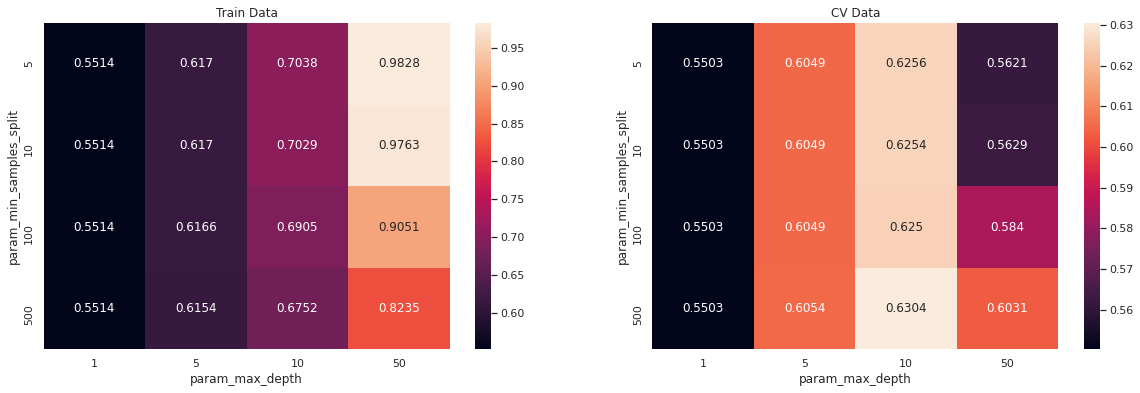

In [111]:
results_from_gridsearchcv = pd.DataFrame(grid_search.cv_results_)

max_auc_scores = results_from_gridsearchcv.groupby(['param_min_samples_split', 'param_max_depth']).max()

max_auc_scores = max_auc_scores.unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.heatmap(max_auc_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_auc_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Data')
ax[1].set_title('CV Data')
plt.show()


### A basic observtion on the above Heatmap

- For training dataset the best score is coming max_depth = 50 and min_samples_split = 500
- For validation dataset the best score is coming max_depth = 10 and min_samples_split = 500

## ROC curve - After finding the best hyper parameter, training our model with it, and finding the AUC on test data and plot the ROC curve on both train and test.


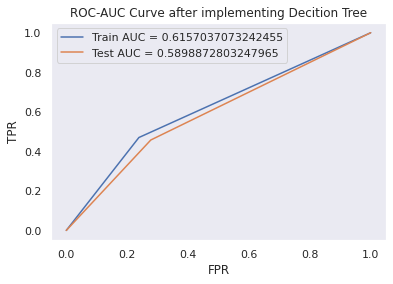

In [112]:
dt_clf = DecisionTreeClassifier(max_depth=10, min_samples_split=500, class_weight='balanced')
dt_clf.fit(X_train_s1_merged, y_train )

y_train_predicted = dt_clf.predict(X_train_s1_merged)
y_test_predicted = dt_clf.predict(X_test_s1_merged)

s1_train_fpr, s1_train_tpr, s1_train_threshold = roc_curve(y_train, y_train_predicted)
s1_test_fpr, s1_test_tpr, s1_test_threshold = roc_curve(y_test, y_test_predicted)

plt.plot(s1_train_fpr, s1_train_tpr, label="Train AUC = "+str(auc(s1_train_fpr, s1_train_tpr)))
plt.plot(s1_test_fpr, s1_test_tpr, label="Test AUC = "+str(auc(s1_test_fpr, s1_test_tpr)))
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.title('ROC-AUC Curve after implementing Decition Tree')
plt.show()

## Confusion matrix with predicted and original labels of test data points

confusion_matrix_s1_train  [[14724  4614]
 [57302 50816]]


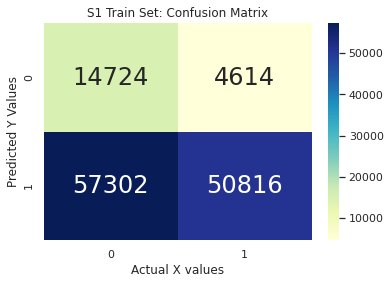

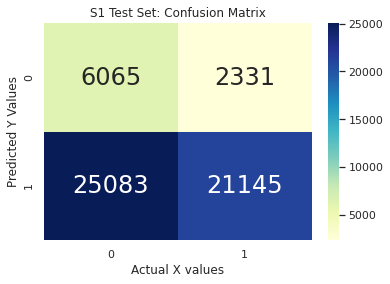

In [113]:
# First the Function to get the Predicted Y_vector based on a given threshold and fpr & tpr
# This will be needed for Calculating Confusion Matrix

def calculate_y_vector_from_threshold(proba, threshold, fpr, tpr):
  
    # Using argmax to return the position of the largest value.
    # based on the calculated value of tpr*(1-fpr)
    # tpr * (1-fpr) i.e. optimal_threshold is maximum when fpr is very low and tpr is very high
    optimal_threshold = threshold[np.argmax(tpr * (1-fpr))]  

  
    predicted_y_vector = []
    for i in proba:
        if i >= optimal_threshold:
            predicted_y_vector.append(1)
        else:
            predicted_y_vector.append(0)

    return predicted_y_vector

confusion_matrix_s1_train = confusion_matrix(y_train, calculate_y_vector_from_threshold(y_train_predicted, s1_train_threshold, s1_train_fpr, s1_train_tpr ) )

confusion_matrix_s1_test = confusion_matrix(y_test, calculate_y_vector_from_threshold(y_test_predicted, s1_test_threshold, s1_test_fpr, s1_test_tpr ) )

print('confusion_matrix_s1_train ', confusion_matrix_s1_train)
# Heatmap for Confusion Matrix: Train and SET 1
heatmap_confusion_matrix_train_s1 = sns.heatmap(confusion_matrix_s1_train, annot=True, fmt='d', cmap="YlGnBu", annot_kws={"size": 24})

plt.title('S1 Train Set: Confusion Matrix')
plt.xlabel('Actual X values')
plt.ylabel('Predicted Y Values')
plt.show()

heatmap_confusion_matrix_test_s1 = sns.heatmap(confusion_matrix_s1_test, annot=True, fmt='d', cmap="YlGnBu", annot_kws={"size": 24})

plt.title('S1 Test Set: Confusion Matrix')
plt.xlabel('Actual X values')
plt.ylabel('Predicted Y Values')
plt.show()

## Word-Cloud with all the `false positive data points`

- Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`

- Plot the box plot with the `price` of these `false positive data points`

- Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

In [114]:
# Function to get the indices of the false-positive predictions
# This indices array will later be used to extract the text and price
# of only those rows whose predictions are found to be false-positive
def get_false_positive_indices_from_arr(y_actual, y_predicted):  
  if_false_positives_list =  (y_actual == 0 ) & (y_predicted == 1 )
  # "if_false_positives_list" is a list-of-booleans like so 
  # [True, False, True, False, ...., True]    
  # Below will return me the y_actual values satisfying the above condtion 
  # i.e. ONLY those elements where if_false_positives_list has a True value
  y_values_of_false_positives = y_actual[if_false_positives_list]
  indices_of_false_positives = np.in1d(y_actual, y_values_of_false_positives).nonzero()[0]
  return indices_of_false_positives

# In above I am filtering-a-list-based-on-a-list-of-booleans
# https://stackoverflow.com/a/18666622/1902852
# list_a = np.array([1, 2, 4, 6])
# filter = np.array([True, False, True, False])
# list_a[filter]
# OUTPUT  =>  array([1, 4])


# Function to create the whole text to be fed to wordcloud
def generate_word_cloud_from_text(text):
  cloud_text = ''
  for t in text:
    cloud_text += ' ' + t
    
  return cloud_text

# Function to create the plot of the wordcloud
def wordcloud_plotter(text):
  # wordcloud = WordCloud(background_color = 'white', min_word_length=5)
  wordcloud = WordCloud(width = 2000, height = 800, background_color ="black", min_font_size = 8)
  image_of_word = wordcloud.generate(text)
  plt.figure(figsize=(20, 12))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

# X_train_vectorized_tfidf_essay

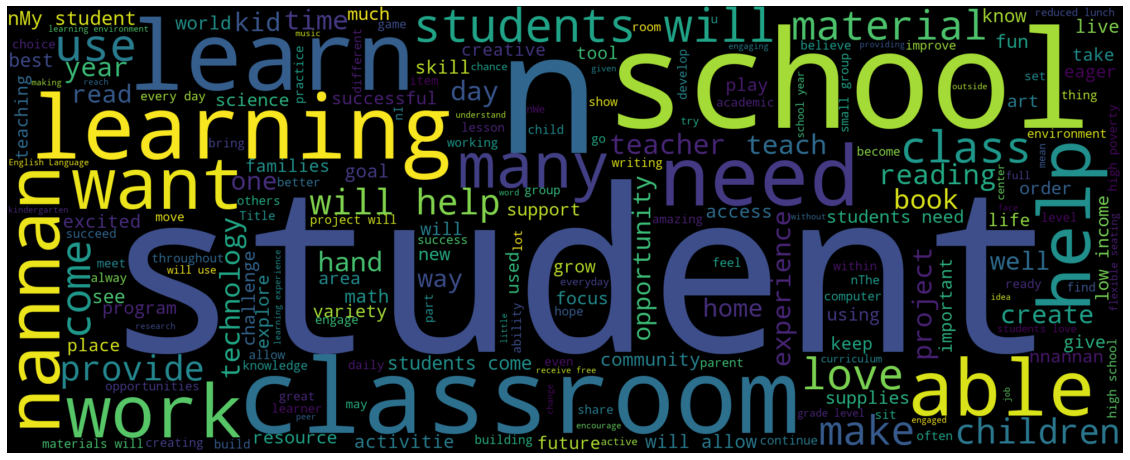

In [115]:
row_indices_of_false_positives_test_data = get_false_positive_indices_from_arr(y_test, y_test_predicted)
# print('row_indices_of_false_positives_test_data ', row_indices_of_false_positives_test_data.shape)

X_test_essays_original_data = X_test['essay'].values
# print('X_test_essays_original_data ', X_test_essays_original_data.shape)

essays_text_of_false_positives_test_data = X_test_essays_original_data[row_indices_of_false_positives_test_data]
# print('essays_text_of_false_positives_test_data ', essays_text_of_false_positives_test_data)

text_generated = generate_word_cloud_from_text(essays_text_of_false_positives_test_data)

wordcloud_plotter(text_generated)

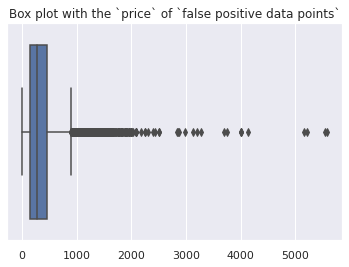

In [116]:
X_test_price_original_data = X_test['price'].values
# print('row_indices_of_false_positves_test_data ', row_indices_of_false_positves_test_data)

price_row_values_of_false_positive_test_data = X_test_price_original_data[row_indices_of_false_positives_test_data]
# print('price_row_values_of_false_positive_test_data ', price_row_values_of_false_positive_test_data)

sns.boxplot(price_row_values_of_false_positive_test_data)

plt.title('Box plot with the `price` of `false positive data points`')

plt.show()

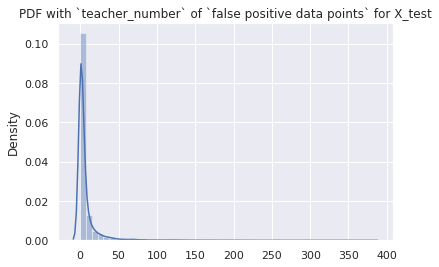

In [117]:
X_test_teacher_number_original_data = X_test['teacher_number_of_previously_posted_projects'].values

teacher_number_values_of_false_positive_test_data = X_test_teacher_number_original_data[row_indices_of_false_positives_test_data]

sns.distplot(teacher_number_values_of_false_positive_test_data)

plt.title('PDF with `teacher_number` of `false positive data points` for X_test')

plt.show()

# Set-2: categorical, numerical features +  essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)

The only change in Set-2 is the "essay" column - Now here I have to calculate the TFIDF W2V instead of just TFIDF

The rest of the Vectorized column will remain same, and hence I just need do the merging with hstack() this new TFIDF W2V column for 'text'

In [118]:
with open(glove_vector_path, 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
    
# In the TF-IDF Word2Vec vectorization, we have to fit the TfidfVectorizer only on X_train['essay'] and 
# extract 'dictionary' (dictionary with features as the keys and IDF scores as the values) and 
# 'tfidf_words' (a set of all the features extracted from the vectorizer). 
# We have to use the same 'dictionary' and 'tfidf_words' in vectorizing both X_train['essay'] and X_test['essay'].

# Now, at the very top section of this Notebook, we alrady have this code of Vectorizer on X_train data
# vectorizer_essay_tfidf = TfidfVectorizer(min_df=10)
# vectorizer_essay_tfidf.fit(X_train['essay'].values)

# Hence we are now converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(vectorizer_essay_tfidf.get_feature_names(), list(vectorizer_essay_tfidf.idf_)))
tfidf_words = set(vectorizer_essay_tfidf.get_feature_names())     

    
# Function to generate Word2Vec referencing "4_Reference_Vectorization.ipynb" given in the instruction
def generate_w2v_from_text(essays_text_arr):
  # compute average word2vec for each review.
    tfidf_w2v_vectors = []
    # the avg-w2v for each sentence/review is stored in this list

    for sentence in tqdm(essays_text_arr):  # for each sentence
        vector = np.zeros(300)  # as word vectors are of zero length
        tf_idf_weight = 0
        # num of words with a valid vector in the sentence
        for word in sentence.split():  # for each word in a sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word]  # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word] * (
                    sentence.count(word) / len(sentence.split())
                )  # getting the tfidf value for each word
                vector += vec * tf_idf  # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    return tfidf_w2v_vectors
  
X_train_vectorized_tfidf_w2v_essay = generate_w2v_from_text(X_train['essay'].values)
X_test_vectorized_tfidf_w2v_essay = generate_w2v_from_text(X_test['essay'].values)


100%|██████████| 54624/54624 [03:47<00:00, 240.48it/s]


## Merging (with hstack) to construct S2 for TFIDF W2V

In [119]:
X_train_s2_merged = hstack((X_train_vectorized_tfidf_w2v_essay, X_train_vectorized_ohe_school_state, X_train_vectorized_ohe_teacher_prefix, X_train_vectorized_ohe_project_grade_category, X_train_vectorized_ohe_project_subject_categories, X_train_vectorized_ohe_project_subject_subcategories, X_train_normalized_price, X_train_negative_sent_standardized, X_train_positive_sent_standardized, X_train_neutral_sent_standardized, X_train_compound_sent_standardized ))


X_test_s2_merged = hstack((X_test_vectorized_tfidf_w2v_essay, X_test_vectorized_ohe_school_state, X_test_vectorized_ohe_teacher_prefix, X_test_vectorized_ohe_project_grade_category, X_test_vectorized_ohe_project_subject_categories, X_test_vectorized_ohe_project_subject_subcategories , X_test_normalized_price, X_test_negative_sent_standardized, X_test_positive_sent_standardized, X_test_neutral_sent_standardized, X_test_compound_sent_standardized ))


print('X_train_s2_merged.shape ', X_train_s2_merged.shape)
print('X_test_s2_merged.shape ', X_test_s2_merged.shape)

X_train_s2_merged.shape  (127456, 820)
X_test_s2_merged.shape  (54624, 820)


In [120]:
depth_dt_gridsearch = [1, 5, 10, 50]
split_dt_gridsearch = [5, 10, 100, 500]

parameters_dict = { 'max_depth': depth_dt_gridsearch, 'min_samples_split': split_dt_gridsearch }

decision_tree = DecisionTreeClassifier(class_weight='balanced')

clf_s2 = GridSearchCV(decision_tree, parameters_dict, cv=3, scoring='roc_auc', return_train_score=True)

clf_s2.fit(X_train_s2_merged, y_train)

print('Best Params from GridSearchCV for Set S2 ', clf_s2.best_params_)
# Best Params from GridSearchCV for Set S2  {'max_depth': 5, 'min_samples_split': 500}

Best Params from GridSearchCV for Set S2  {'max_depth': 5, 'min_samples_split': 5}


## Heatmap for Set S2 - Plot the performance of model both on train data and cross validation data for each hyper parameter, with rows as min_sample_split, columns as max_depth, and values inside the cell representing AUC Score

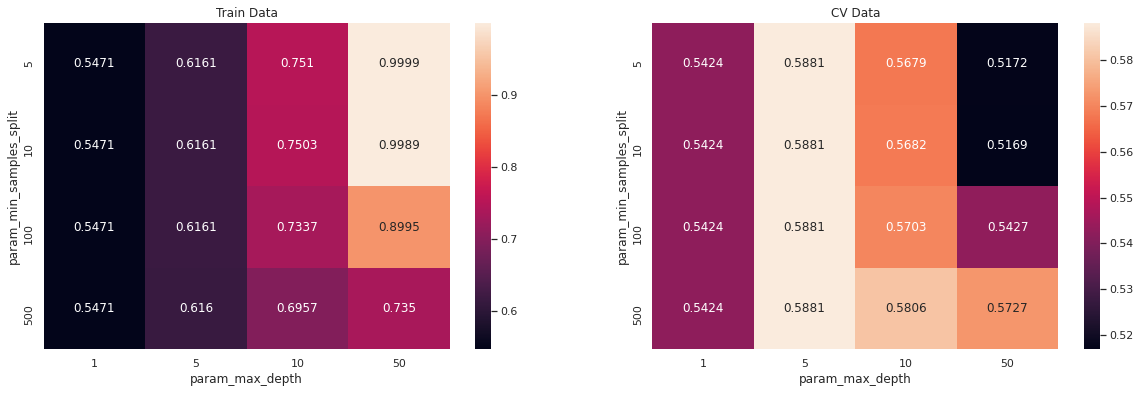

In [121]:
results_from_gridsearchcv = pd.DataFrame(clf_s2.cv_results_)

max_auc_scores = results_from_gridsearchcv.groupby(['param_min_samples_split', 'param_max_depth']).max()

max_auc_scores = max_auc_scores.unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.heatmap(max_auc_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_auc_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Data')
ax[1].set_title('CV Data')
plt.show()


### Set S2 - A basic observtion on the above Heatmap

- For training dataset the best score is coming max_depth = 50 and min_samples_split = 500
- For validation dataset the best score is coming max_depth = 5 and min_samples_split = 500 as given in the GridSearchCV best_params_

## Set S2 - ROC curve - After finding the best hyper parameter, training our model with it, and finding the AUC on test data and plot the ROC curve on both train and test.


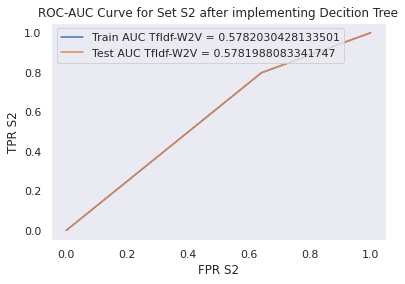

In [122]:
dt_clf_s2 = DecisionTreeClassifier(max_depth=5, min_samples_split=500, class_weight='balanced')
dt_clf_s2.fit(X_train_s1_merged, y_train )

y_train_predicted = dt_clf_s2.predict(X_train_s1_merged)
y_test_predicted_s2 = dt_clf_s2.predict(X_test_s1_merged)

s2_train_fpr, s2_train_tpr, s2_train_threshold = roc_curve(y_train, y_train_predicted)
s2_test_fpr, s2_test_tpr, s2_test_threshold = roc_curve(y_test, y_test_predicted_s2)

plt.plot(s2_train_fpr, s2_train_tpr, label="Train AUC TfIdf-W2V = "+str(auc(s2_train_fpr, s2_train_tpr)))
plt.plot(s2_test_fpr, s2_test_tpr, label="Test AUC TfIdf-W2V = "+str(auc(s2_test_fpr, s2_test_tpr)))
plt.legend()
plt.xlabel('FPR S2')
plt.ylabel('TPR S2')
plt.grid()
plt.title('ROC-AUC Curve for Set S2 after implementing Decition Tree')
plt.show()

## S2 - Confusion matrix with predicted and original labels of test data points

confusion_matrix_s2_train  [[ 6935 12403]
 [21863 86255]]


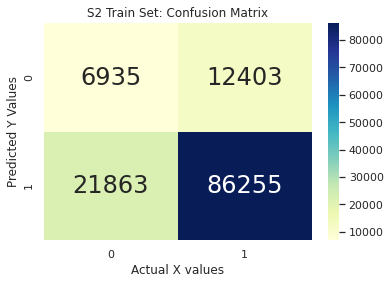

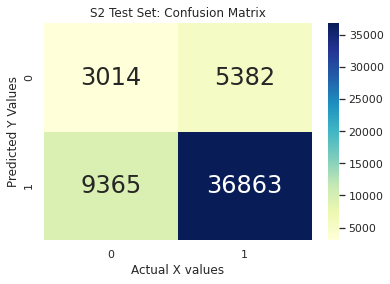

In [123]:
confusion_matrix_s2_train = confusion_matrix(y_train, calculate_y_vector_from_threshold(y_train_predicted, s2_train_threshold, s2_train_fpr, s2_train_tpr ) )

confusion_matrix_s2_test = confusion_matrix(y_test, calculate_y_vector_from_threshold(y_test_predicted_s2, s2_test_threshold, s2_test_fpr, s2_test_tpr ) )

print('confusion_matrix_s2_train ', confusion_matrix_s2_train)
# Heatmap for Confusion Matrix: Train and SET 1
heatmap_confusion_matrix_train_s2 = sns.heatmap(confusion_matrix_s2_train, annot=True, fmt='d', cmap="YlGnBu", annot_kws={"size": 24})

plt.title('S2 Train Set: Confusion Matrix')
plt.xlabel('Actual X values')
plt.ylabel('Predicted Y Values')
plt.show()

heatmap_confusion_matrix_test_s2 = sns.heatmap(confusion_matrix_s2_test, annot=True, fmt='d', cmap="YlGnBu", annot_kws={"size": 24})

plt.title('S2 Test Set: Confusion Matrix')
plt.xlabel('Actual X values')
plt.ylabel('Predicted Y Values')
plt.show()

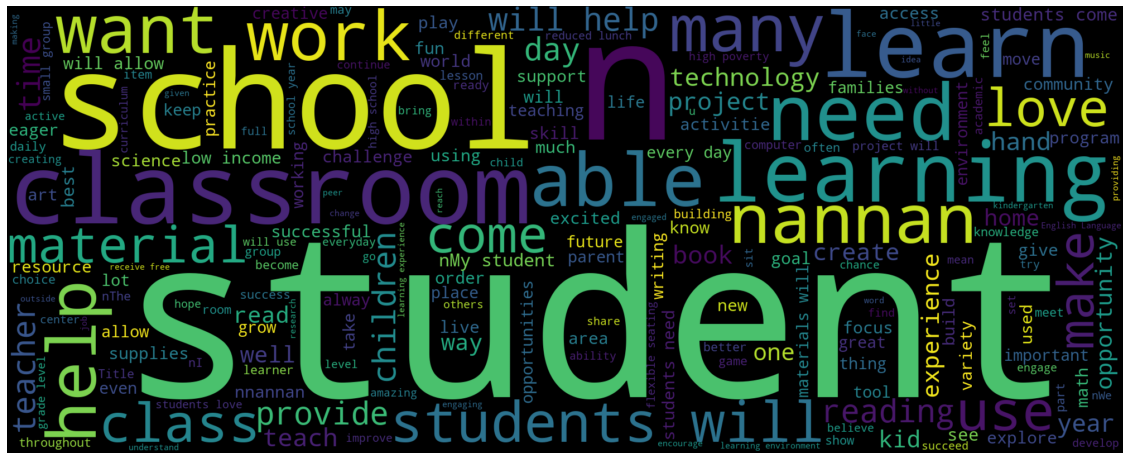

In [124]:
row_indices_of_false_positives_test_data_s2 = get_false_positive_indices_from_arr(y_test, y_test_predicted_s2)

X_test_essays_original_data = X_test['essay'].values
# print('X_test_essays_original_data ', X_test_essays_original_data.shape)

essays_text_of_false_positives_test_data = X_test_essays_original_data[row_indices_of_false_positives_test_data_s2]
# print('essays_text_of_false_positives_test_data ', essays_text_of_false_positives_test_data)

text_generated = generate_word_cloud_from_text(essays_text_of_false_positives_test_data)

wordcloud_plotter(text_generated)

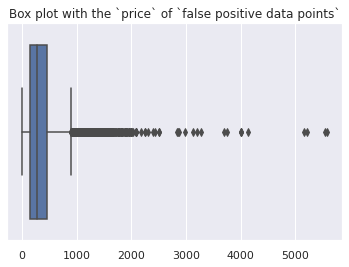

In [125]:
X_test_price_original_data = X_test['price'].values
# print('row_indices_of_false_positves_test_data ', row_indices_of_false_positves_test_data)

price_row_values_of_false_positive_test_data = X_test_price_original_data[row_indices_of_false_positives_test_data_s2]
# print('price_row_values_of_false_positive_test_data ', price_row_values_of_false_positive_test_data)

sns.boxplot(price_row_values_of_false_positive_test_data)

plt.title('Box plot with the `price` of `false positive data points`')

plt.show()

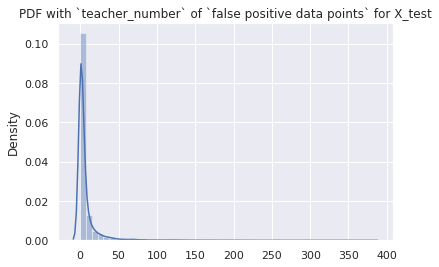

In [126]:
X_test_teacher_number_original_data = X_test['teacher_number_of_previously_posted_projects'].values

teacher_number_values_of_false_positive_test_data = X_test_teacher_number_original_data[row_indices_of_false_positives_test_data_s2]

sns.distplot(teacher_number_values_of_false_positive_test_data)

plt.title('PDF with `teacher_number` of `false positive data points` for X_test')

plt.show()

Now we will do the below

# <font color='red'><b> Calculating Non-zero feature importance on Set-1 Features </b></font>

### Feature Importance on Set-1

*  Selecting all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  Hyperparameter tuning corresponding to the model you selected
  
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  
Summarize the results    

In [127]:
dt_clf = DecisionTreeClassifier(class_weight='balanced')

# As Indexing is not implemented for the coo format. 
# Hence using tocsr() - otherwise later can not access elements by index
# So without it, X_train_s1_merged[:, important_features > 0 ] will throw below error
# 'coo_matrix' object is not subscriptable
X_train_s1_merged_csr = X_train_s1_merged.tocsr()
dt_clf.fit(X_train_s1_merged_csr, y_train)

X_test_s1_merged_csr = X_test_s1_merged.tocsr()

important_features = np.array(dt_clf.feature_importances_)

# print("important_features length ", len(important_features))
# print('X_train_s1_merged ', X_train_s1_merged_csr.shape)

X_train_s1_merged_important_features = X_train_s1_merged_csr[:, important_features > 0 ]
X_test_s1_merged_important_features = X_test_s1_merged_csr[:, important_features > 0 ]

In [128]:

svc = LinearSVC()

# params_svc_gridsearchcv =  {
#   'C': expon(loc=0, scale=4),
# }

hyperparams_svc_gridsearchcv =  {
  "C": np.logspace(0, 4, 10)    
}

gridsearch_svc = GridSearchCV(svc, hyperparams_svc_gridsearchcv, cv=3)

gridsearch_svc.fit(X_train_s1_merged_important_features, y_train )

print('Best Params from GridSearchCV with Important Features ', gridsearch_svc.best_params_)

Best Params from GridSearchCV with Important Features  {'C': 1.0}


Text(0.5, 0, 'False Positive Rate Imp_features')

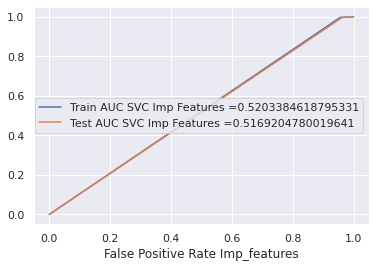

In [129]:
svc = LinearSVC(C=1)
svc.fit(X_train_s1_merged_important_features, y_train )

y_train_predicted = svc.predict(X_train_s1_merged_important_features)
y_test_predicted = svc.predict(X_test_s1_merged_important_features)


train_fpr_imp_features, train_tpr_imp_features, train_thresholds_imp_features = roc_curve(y_train, y_train_predicted)

test_fpr_imp_features, test_tpr_imp_features, test_thresholds_imp_features = roc_curve(y_test, y_test_predicted)

plt.plot(train_fpr_imp_features, train_tpr_imp_features, label="Train AUC SVC Imp Features ="+str(auc(train_fpr_imp_features, train_tpr_imp_features)))

plt.plot(test_fpr_imp_features, test_tpr_imp_features, label="Test AUC SVC Imp Features ="+str(auc(test_fpr_imp_features, test_tpr_imp_features)))

plt.legend()

plt.xlabel("False Positive Rate Imp_features")


In [130]:
confusion_matrix(y_train, y_train_predicted)

array([[   851,  18487],
       [   360, 107758]])

In [131]:
confusion_matrix(y_test, y_test_predicted)

array([[  319,  8077],
       [  192, 46036]])

In [133]:
import pandas as pd

pd.DataFrame({
  'Model':['TfIdf',  'Tfidf-W2V', 'LinearSVC'],
  'Train AUC': [0.62, 0.58, 0.52],
  'Test AUC': [0.60, 0.58, 0.52]
})

Model  Train AUC  Test AUC
0      TfIdf       0.62      0.60
1  Tfidf-W2V       0.58      0.58
2  LinearSVC       0.52      0.52